# hw8

1. 使用housing_renamed.csv中的数据构建3个不同的线性回归模型：因变量为value_per_sq_ft,
自变量请自己选择(并不要求使用变量选择方法，自行选择即可)。

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf

In [2]:
house = pd.read_csv("housing_renamed.csv")
house
##%% cell 3

,neighborhood,type,units,year_built,sq_ft,income,income_per_sq_ft,expense,expense_per_sq_ft,net_income,value,value_per_sq_ft,boro
0,FINANCIAL,R9-CONDOMINIUM,42,1920.0,36500,1332615,36.51,342005,9.37,990610,7300000,200.00,Manhattan
1,FINANCIAL,R4-CONDOMINIUM,78,1985.0,126420,6633257,52.47,1762295,13.94,4870962,30690000,242.76,Manhattan
2,FINANCIAL,RR-CONDOMINIUM,500,NaN,554174,17310000,31.24,3543000,6.39,13767000,90970000,164.15,Manhattan
3,FINANCIAL,R4-CONDOMINIUM,282,1930.0,249076,11776313,47.28,2784670,11.18,8991643,67556006,271.23,Manhattan
4,TRIBECA,R4-CONDOMINIUM,239,1985.0,219495,10004582,45.58,2783197,12.68,7221385,54320996,247.48,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,ROSEBANK,R4-CONDOMINIUM,52,NaN,62391,831672,13.33,326305,5.23,505367,3354003,53.76,Staten Island
2622,ARROCHAR-SHORE ACRES,R4-CONDOMINIUM,102,1987.0,90618,1274089,14.06,637045,7.03,637044,5233000,57.75,Staten Island
2623,GRANT CITY,R4-CONDOMINIUM,100,1986.0,78903,1321625,16.75,673832,8.54,647793,4687000,59.40,Staten Island
2624,GRANT CITY,R4-CONDOMINIUM,159,1961.0,166712,2343971,14.06,1171985,7.03,1171986,5967531,35.80,Staten Island


In [3]:
lf = linear_model.LinearRegression()
unit_model = lf.fit(X=house[["units"]], y=house["value_per_sq_ft"])
unit_model.coef_

array([0.07280365])

In [4]:
unit_model.intercept_

126.07755849901322

In [5]:
income_model = lf.fit(X=house[["income"]], y=house["value_per_sq_ft"])
income_model.coef_

array([6.57888078e-06])

In [6]:
income_model.intercept_

113.81315745855613

In [7]:
sq_ft_model = lf.fit(X=house[["sq_ft"]], y=house["value_per_sq_ft"])
sq_ft_model.coef_

array([0.00010226])

In [8]:
sq_ft_model.intercept_

122.72382848891185

2. 使用iris.csv数据进行聚类分析：不用variety列，使用前四列数据进行Kmeans聚类分析(k=3)，
并使用pca降维后作图显示聚类结果，然后与variety进行比较。

In [9]:
df = pd.read_csv("iris.csv")
iris = df.drop("variety", axis=1)
iris.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

iris_kmenans = KMeans(n_clusters=3)
iris_kmenans.fit(iris)
labels = iris_kmenans.labels_

In [11]:
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris)
print(len(iris_pca[:, 0]), "\n", len(iris_pca[:, 1]))

150 
 150


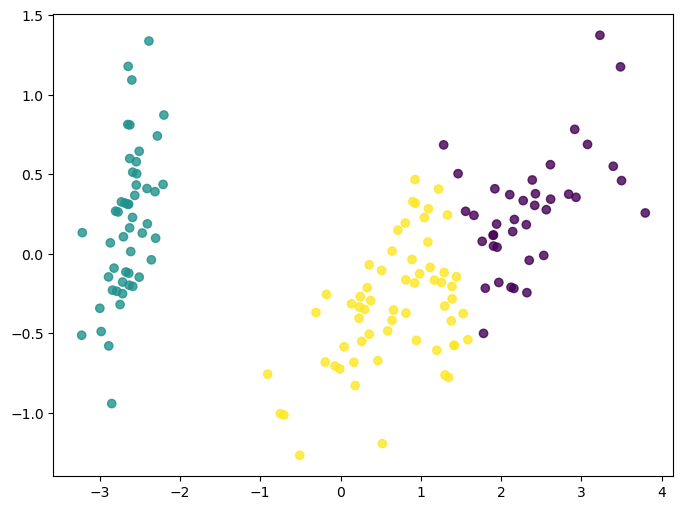

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(
    x=iris_pca[:, 0],
    y=iris_pca[:, 1],
    c=labels,
    cmap="viridis",
    alpha=0.8,
    label="kmeans clusterd data",
)

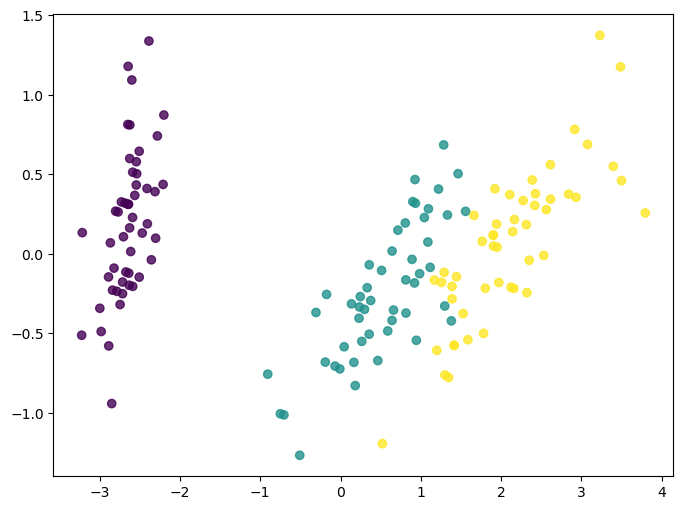

In [13]:
variety_mapping = {"Setosa": 0, "Versicolor": 1, "Virginica": 2}
variety_labels = df["variety"].map(variety_mapping)
plt.figure(figsize=(8, 6))

plt.scatter(
    x=iris_pca[:, 0],
    y=iris_pca[:, 1],
    c=variety_labels,
    cmap="viridis",
    alpha=0.8,
    label="kmeans clusterd data",
)

3. 参考statistical simulation中的Monte Carlo Integration，模拟计算PI的值。

In [14]:
total = 10**6
x = np.random.rand(total)
y = np.random.rand(total)
inside=x**2+y**2<=1
rate=np.sum(inside)/total
pi_estimater=4*rate
pi_estimater

3.142416

/home/flyingbucket/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


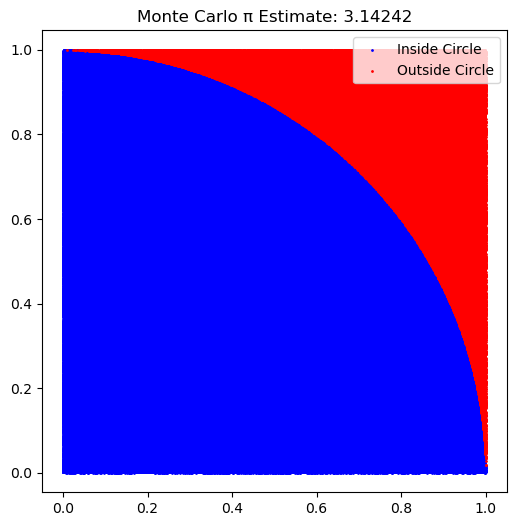

In [15]:
plt.figure(figsize=(6,6))
plt.scatter(x[inside], y[inside], s=1, color='blue', label='Inside Circle')
plt.scatter(x[~inside], y[~inside], s=1, color='red', label='Outside Circle')
plt.title(f'Monte Carlo π Estimate: {pi_estimater:.5f}')
plt.legend()
plt.axis('equal')
plt.show()